In [93]:
import pandas as pd
md = pd.read_excel('meta.xlsx')
md = md.set_index('filename')
md

,Id,Author first name,Author last name,Title,Short unique title,Boarding school novel?,Publication date,Sex author
filename,,,,,,,,
dejongeprinsen.txt,1,Guus,Kuijer,De jonge prinsen,prinsen,no,NaN,M
demanmetdehamer.txt,2,Guus,Kuijer,De man met de hamer,man_hamer,no,NaN,M
dereddervanafrikaLG.txt,3,Guus,Kuijer,De redder van Afrika,redder_Afrika,no,NaN,M
detranenknallenuitmijnkopVJ.txt,4,Guus,Kuijer,De tranen knallen uit mijn kop,tranen_kop,no,NaN,M
dezwartestenenVJ.txt,5,Guus,Kuijer,De zwarte stenen,zwart_stenen,no,NaN,M
drieverschrikkelijkedagenLDG.txt,6,Guus,Kuijer,Drie verschrikkelijke dagen,drie_dagen,no,NaN,M
eendvooreendVJ.txt,7,Guus,Kuijer,Eend voor eend,eend,no,NaN,M
eengatindegrensVJ.txt,8,Guus,Kuijer,Een gat in de grens,gat_grens,no,NaN,M
eenhoofdvolmacaroniVJ.txt,9,Guus,Kuijer,Een hoofd vol macaroni,hoofd_macaroni,no,NaN,M


In [94]:
import numpy as np
authors, titles, texts = [], [], []
for fn in md.index:
    print(fn)
    try:
        with open('kuijer/txts/' + fn, 'r', encoding='utf8') as f:
            text = f.read()
    except:
        continue
    texts.append(text)
    title = '_'.join(md.loc[fn]['Short unique title'].lower().split())
    titles.append(title)
    author = md.loc[fn]['Author last name']
    if pd.isna(author):
        author = md.loc[fn]['Author first name']
    authors.append(author.lower())

dejongeprinsen.txt
demanmetdehamer.txt
dereddervanafrikaLG.txt
detranenknallenuitmijnkopVJ.txt
dezwartestenenVJ.txt
drieverschrikkelijkedagenLDG.txt
eendvooreendVJ.txt
eengatindegrensVJ.txt
eenhoofdvolmacaroniVJ.txt
grotemensendaarkanjebetersoepvankokenVJ.txt
hetboekvanalledingenVJ.txt
hetdochtertjevandewasvrouwLDG.txt
hetgelukkomtalsdedonderAM.txt
hetisfijnomertezijnIR.txt
hetlandvandeneushoornvleugel.txt
hetvogeltjevanamsterdam.txt
hoemiekemomhaarmaffemoedervindt.txt
ikbenpollekehoorLDG.txt
ikwoondeineenleunstoelLDG.txt
izebelvantyrus.txt
krasseninhettafelbladVJ.txt
metdepoppengooienVJ.txt
metdewindmeenaardezeeLDG.txt
olleLDG.txt
opjekopindeprullenbakVJ.txt
pappaiseenhondLG.txt
tintoevalendekunstvanhetverdwalenLDG.txt
tintoevalendekunstvanmadeliefLDG.txt
tintoevalenhetgeheimvantweebeenseilandLDG.txt
tintoevalindeonderwereldLDG.txt
vooraltijdsamenamenLDG.txt


In [95]:
print(len(authors))
print(len(titles))
print(len(texts))

30
30
30


In [129]:
import sklearn.feature_extraction.text as text

vectorizer = text.CountVectorizer(max_features=2000, ngram_range=(2, 3),
                                 min_df=0.25,
                                 token_pattern=r"(?u)\b\w+\b")

In [130]:
v_documents = vectorizer.fit_transform(texts).toarray()
print(v_documents.shape)
print(vectorizer.get_feature_names()[:100])

(30, 2000)
['aan dat', 'aan de', 'aan de andere', 'aan de hand', 'aan de overkant', 'aan die', 'aan doen', 'aan een', 'aan en', 'aan haar', 'aan het', 'aan hij', 'aan ik', 'aan je', 'aan maar', 'aan met', 'aan mijn', 'aan t', 'aan tafel', 'aan te', 'aan te kijken', 'aan wat', 'aan ze', 'aan zijn', 'achter de', 'achter een', 'achter haar', 'achter hem', 'achter hem aan', 'achter zich', 'achter zijn', 'adem in', 'af en', 'af en toe', 'af te', 'al die', 'al een', 'al gauw', 'al te', 'alle kanten', 'alle mensen', 'alleen de', 'alleen maar', 'alles wat', 'als dat', 'als de', 'als die', 'als een', 'als er', 'als het', 'als hij', 'als ie', 'als ik', 'als je', 'als jij', 'als u', 'als we', 'als ze', 'als zij', 'alsof er', 'alsof het', 'alsof hij', 'alsof ze', 'andere kant', 'anders dan', 'arm om', 'armen om', 'auto s', 'bang dat', 'bang voor', 'bed en', 'bedoel je', 'begon te', 'begreep niet', 'ben een', 'ben ik', 'ben je', 'ben jij', 'ben niet', 'bent een', 'bent u', 'betekent dat', 'bij de',

In [131]:
import numpy as np
import sklearn.preprocessing as preprocessing

v_documents = preprocessing.normalize(v_documents.astype(float), norm='l1')
print(v_documents.shape)

scaler = preprocessing.StandardScaler()
v_documents = scaler.fit_transform(v_documents)
print(v_documents.shape)

(30, 2000)
(30, 2000)


In [132]:
import scipy.spatial.distance as distance
dm = distance.pdist(v_documents, 'cityblock')
print(distance.squareform(dm).shape)

(30, 30)


In [133]:
import scipy.cluster.hierarchy as hierarchy
linkage_object = hierarchy.linkage(dm, method='ward')

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

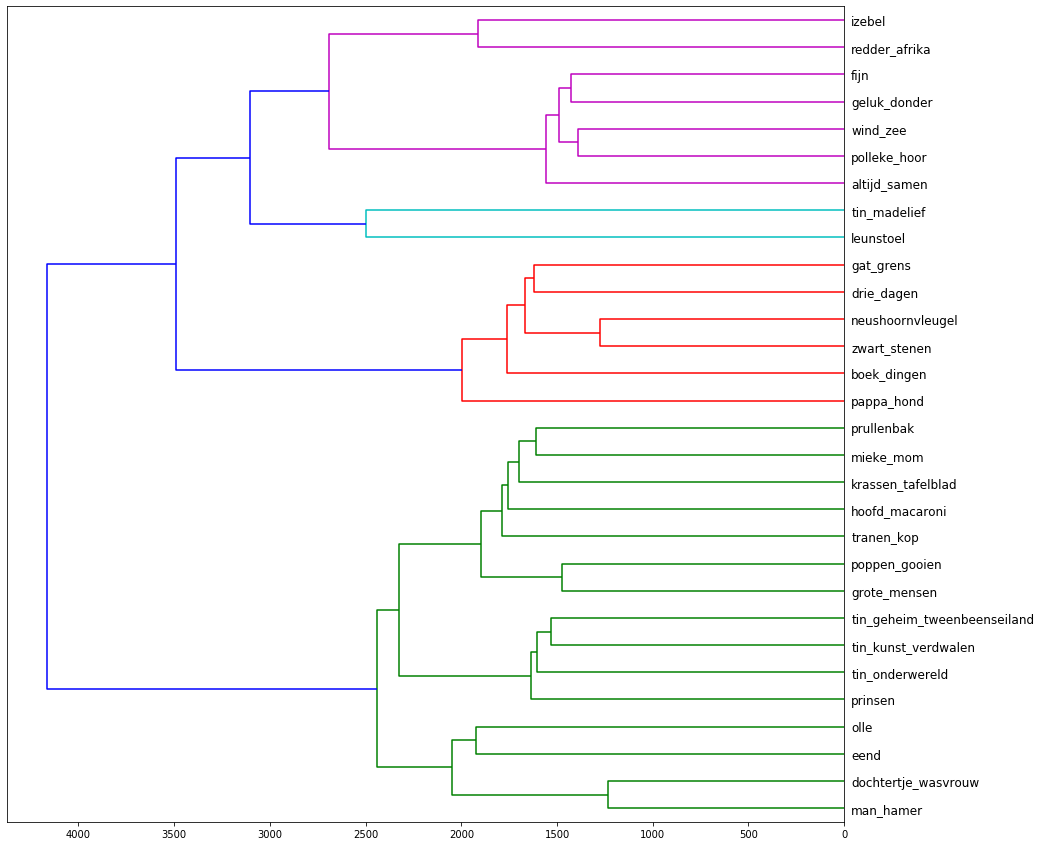

In [135]:
plt.figure(figsize=(15, 15))
names = ['_'.join((a)) for a in zip(titles)]
d = hierarchy.dendrogram(linkage_object,
                        labels=names,
                        orientation='left', leaf_font_size=12)

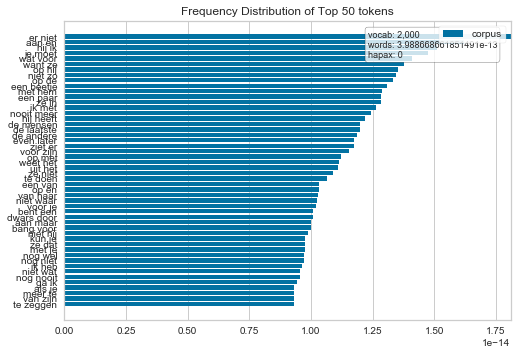

In [157]:
from yellowbrick.text import FreqDistVisualizer

features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='h')
visualizer.fit(v_documents)
visualizer.poof()